# 第5回 識別その1: 基本的事項

いつものように右上の「Remix」ボタンを押して自分用の複製を作成すれば、各セルを「Shift+Enter」で実行しながら読むことができます。途中まで実行したらWindowsでは「Ctrl+s」、Macでは「Cmd+s」で保存することができます。

必要なパッケージを読み込みます

In [1]:
using Plots, CSV, Statistics, LinearAlgebra

# 線形識別: 2クラス

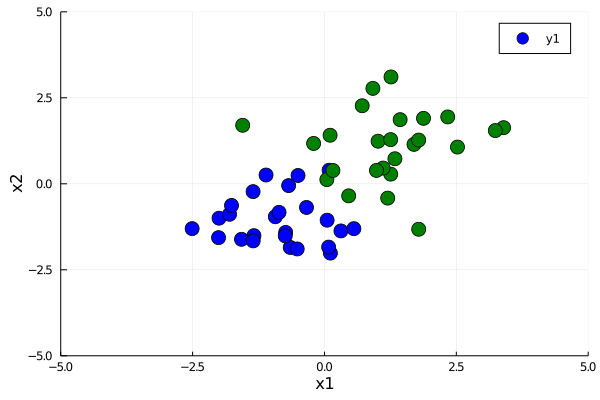

In [1]:
# データを作る
N = 50
y_class1 = ones(Float64, Int(N/2))
x_class1 = randn(Float64, Int(N/2), 2) .- 1.0 #randnは標準正規分布からサンプルする関数
color_class1 = fill(:blue, Int(N/2))
y_class2 = - ones(Float64, Int(N/2))
x_class2 = randn(Float64, Int(N/2), 2) .+ 1.0
color_class2 = fill(:green, Int(N/2))

y = [y_class1; y_class2]
x = [x_class1; x_class2]
c = [color_class1; color_class2]

scatter(x[:, 1], x[:, 2], 
        xlims=(-5,5), ylims=(-5,5), 
        xlabel="x1", ylabel="x2", 
        markersize=8, markercolor=c, 
        legend=:topright)

In [1]:
function solve_linear_classifier(X, y)
	w = inv(X' * X) * X' * y # pinv関数や特異値分解(SVD)を用いるほうが安定に計算できる
  return w
end

solve_linear_classifier

In [1]:
X = ones(N, 3)
X[:, 2:3] = x[:, 1:2]
W = solve_linear_classifier(X, y)

3-element Array{Float64,1}:
  0.0626001
 -0.305074
 -0.381479

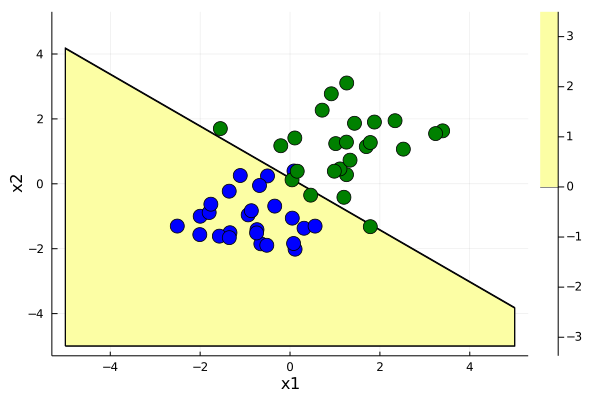

In [1]:
f(x1, x2) = ([1.0 x1 x2]*W)[1]
x1 = x2 = range(-5, 5, length = 100)
contourf(x1, x2, f, levels=[-0.01, 0.0, 0.01])

scatter!(x[:, 1], x[:, 2], 
         xlabel="x1", ylabel="x2", 
         markersize=8, markercolor=c, legend=false)

# 線形識別: 異常値の影響

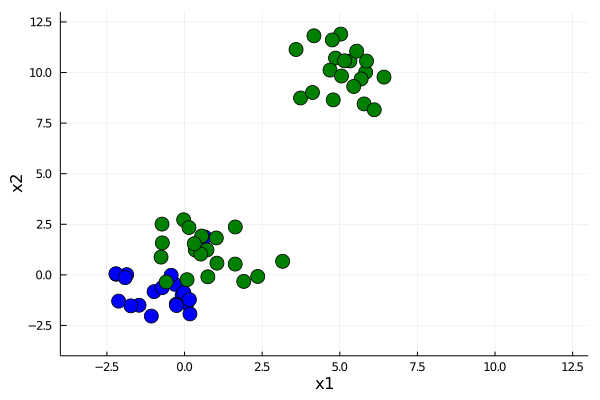

In [1]:
# データを作る
N = 60

y_class1 = ones(Float64, Int(N/3))
x_class1 = randn(Float64, Int(N/3), 2) .- 1.0
color_class1 = fill(:blue, Int(N/3))

y_class2 = - ones(Float64, Int(N/3))
x_class2 = randn(Float64, Int(N/3), 2) .+ 1.0
color_class2 = fill(:green, Int(N/3))

y_class2_outlier = - ones(Float64, Int(N/3))
x_class2_outlier = randn(Float64, Int(N/3), 2) .+ [5.0 10.0]
color_class2_outlier = fill(:green, Int(N/3))

y = [y_class1; y_class2; y_class2_outlier]
x = [x_class1; x_class2; x_class2_outlier]
c = [color_class1; color_class2; color_class2_outlier]

scatter(x[:, 1], x[:, 2], xlims=(-4,13), ylims=(-4,13), xlabel="x1", ylabel="x2", markersize=8, markercolor=c, legend=false)

In [1]:
X = ones(N, 3)
X[:, 2:3] = x[:, 1:2]
W = solve_linear_classifier(X, y)

3-element Array{Float64,1}:
  0.0696878
 -0.180065
 -0.0307941

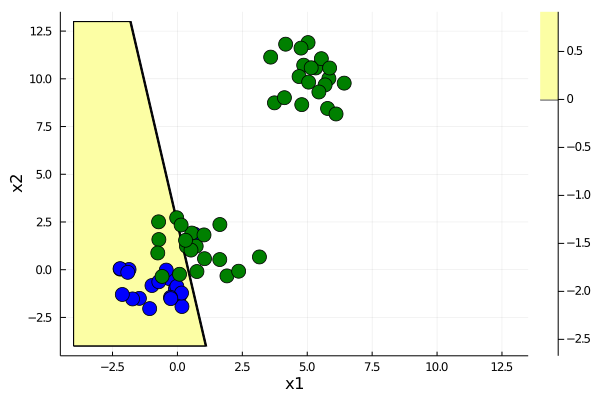

In [1]:
f(x1, x2) = ([1.0 x1 x2]*W)[1]
x1 = x2 = range(-4, 13, length = 100)
contourf(x1, x2, f, levels=[-0.01, 0.0, 0.01])

scatter!(x[:, 1], x[:, 2], xlabel="x1", ylabel="x2", markersize=8, markercolor=c, legend=false)

# 線形識別: 多クラス

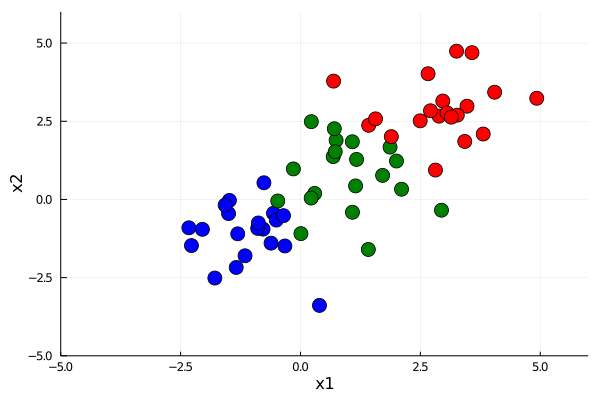

In [1]:
# データを作る, one-hot encoding
N = 60

y_class1 = zeros(Float64, Int(N/3), 3)
y_class1[:, 1] .= 1.0
x_class1 = randn(Float64, Int(N/3), 2) .- 1.0
color_class1 = fill(:blue, Int(N/3))

y_class2 = zeros(Float64, Int(N/3), 3)
y_class2[:, 2] .= 1.0
x_class2 = randn(Float64, Int(N/3), 2) .+ 1.0
color_class2 = fill(:green, Int(N/3))

y_class3 = zeros(Float64, Int(N/3), 3)
y_class3[:, 3] .= 1.0
x_class3 = randn(Float64, Int(N/3), 2) .+ 3.0
color_class3 = fill(:red, Int(N/3))

y = [y_class1; y_class2; y_class3]
x = [x_class1; x_class2; x_class3]
c = [color_class1; color_class2; color_class3]

scatter(x[:, 1], x[:, 2], xlims=(-5,6), ylims=(-5,6), xlabel="x1", ylabel="x2", markersize=8, markercolor=c, legend=false)

In [1]:
X = ones(N, 3)
X[:, 2:3] = x[:, 1:2]
W = solve_linear_classifier(X, y)

3×3 Array{Float64,2}:
  0.529068    0.333086   0.137847
 -0.141153    0.0316242  0.109529
 -0.0762242  -0.0340198  0.110244

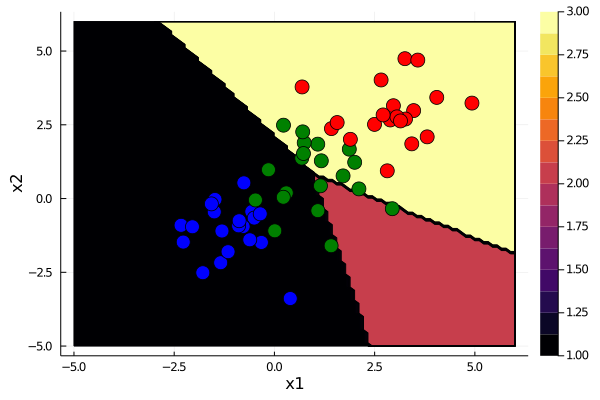

In [1]:
x1 = x2 = range(-5, 6, length = 100)
f(x1, x2) = argmax(([1.0 x1 x2]*W))[2]
contourf(x1, x2, f)

scatter!(x[:, 1], x[:, 2], xlabel="x1", ylabel="x2", markersize=8, markercolor=c, legend=false)

# 小レポート: フィッシャーのアヤメ

第2回で紹介したフィッシャーのアヤメを例に線形識別をやってみましょう。説明変数が4つありますが、可視化できるように1番目と2番目を選んで上と同様の解析をしてみましょう。他の目的変数を2つ選んでどうなるか見てみましょう。

データの説明は以下です

![iris.png](https://nextjournal.com/data/QmcsTUT7gawLt7FGkvJhLYSug8S6Zi8t4DcfkchqF3dzR9?content-type=image/png&node-id=5cb35885-5a1c-48c6-a0bc-47437a655769&filename=iris.png&node-kind=file)

アヤメの個体150サンプルについて、以下の4つの特徴量を計測して、その種(3種, setosa, versicolor, virginica)がラベル付けされています。特徴量と種の関係をデータから学習できるか？という問題に用いられます。例えば、ラベルを使って教師あり学習を行って種を分ける境界を探る問題や、敢えてラベルを用いずにクラスタリングを行ってその性能を検証する問題です。そうした機械学習の手法を評価検証する用途で用いられることが多いです。

* SepalLength ガクの長さ (cm単位、説明変数)
* SepalWidth ガクの太さ (cm単位、説明変数)
* PetalLength 花弁の長さ (cm単位、説明変数)
* PetalWidth 花弁の太さ (cm単位、説明変数)
* Species 種類 (setosa, versicolor, virginica、ラベル・目的変数)

[iris.csv](https://nextjournal.com/data/QmP6fvLv5D5ozPEcbK1vxmbBua2cVZGs7paMudgjhJox5U?content-type=text/csv&node-id=b121356f-73a0-442f-9c5e-c206ebbdea44&filename=iris.csv&node-kind=file)


In [1]:
# CSVデータの読み込み
iris = CSV.read("/.nextjournal/data-named/QmP6fvLv5D5ozPEcbK1vxmbBua2cVZGs7paMudgjhJox5U/iris.csv")

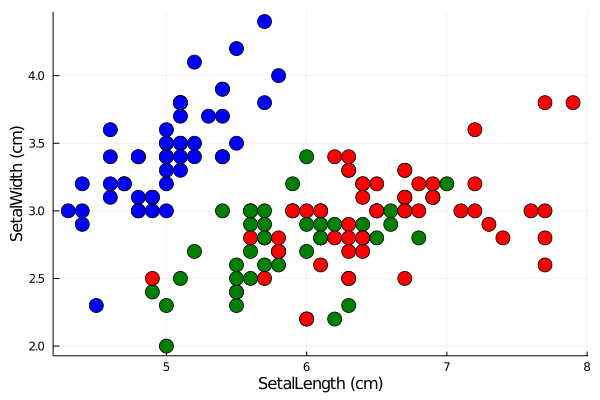

In [1]:
N = size(iris, 1)

y = zeros(Float64, N, 3)
c = fill(:blue, N)
for n = 1:N
  if iris.Species[n] == "setosa"
    y[n, 1] = 1.0
    c[n] = :blue
  elseif iris.Species[n] == "versicolor"
    y[n, 2] = 1.0
    c[n] = :green
  else
    y[n, 3] = 1.0
    c[n] = :red
  end
end

x = Array(iris[:, 2:5])

scatter(x[:, 1], x[:, 2], xlabel="SetalLength (cm)", ylabel="SetalWidth (cm)", markersize=8, markercolor=c, legend=false)

In [1]:
# 線形識別の計算
X = ones(N, 3)
X[:, 2:3] = x[:, 1:2]
W = solve_linear_classifier(X, y)

3×3 Array{Float64,2}:
  0.793093   1.7744     -1.56749
 -0.377084   0.0165175   0.360567
  0.570946  -0.503465   -0.0674812

In [1]:
# 識別結果のプロット
f(x1, x2) = argmax(([1.0 x1 x2]*W))[2]
x1 = range(4, 8, length = 100)
x2 = range(1, 6, length = 100)
contourf(x1, x2, f)

scatter!(x[:, 1], x[:, 2], xlabel="SetalLength (cm)", ylabel="SetalWidth (cm)", markersize=8, markercolor=c, legend=false)

1.0:0.050505050505050504:6.0

In [1]:
# 他の説明変数2つを選んでどうなるか見てみましょう。
X = ones(N, 3)
X[:, 2:3] = x[:, 3:4]
W = solve_linear_classifier(X, y)

3×3 Array{Float64,2}:
  1.26554     -0.105028  -0.160516
 -0.250219     0.321318  -0.0710982
  0.00690815  -0.64185    0.634942

In [1]:
f(x1, x2) = argmax(([1.0 x1 x2]*W))[2]
x1 = range(0, 8, length = 100)
x2 = range(0, 3, length = 100)
contourf(x1, x2, f)

scatter!(x[:, 3], x[:, 4], xlabel="PetalLength (cm)", ylabel="PetalWidth (cm)", markersize=8, markercolor=c, legend=false)

0.0:0.030303030303030304:3.0